# Calculating Customer Lifetime Value (CLV)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Understand the dataset

### Reading the data file 

In [2]:
df = pd.read_csv('HW1 clv_transactions.csv')
df.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94


### Are there any missing values in the dataset

In [3]:
print("Missing values in Transaction ID: {}".format((df['TransactionID'].isnull() | df['TransactionID'].isna()).sum()))
print("Missing values in Transaction Date: {}".format((df['TransactionDate'].isnull() | df['TransactionDate'].isna()).sum()))
print("Missing values in Customer ID: {}".format((df['CustomerID'].isnull() | df['CustomerID'].isna()).sum()))
print("Missing values in Amount: {}".format((df['Amount'].isnull() | df['Amount'].isna()).sum()))

Missing values in Transaction ID: 0
Missing values in Transaction Date: 0
Missing values in Customer ID: 0
Missing values in Amount: 0


There are no missing values in this dataset.

### What is the range of dates in the dataset?

In [4]:
print('Minimum date: {}'.format(min(df['TransactionDate'])))
print('Maximum date: {}'.format(max(df['TransactionDate'])))

Minimum date: 1/1/2011
Maximum date: 9/9/2015


The range of dates is 1/1/2011 to 9/9/2015.

### How many unique customers are there in the dataset?

In [5]:
print('Number of unique customers: {}'.format(df['CustomerID'].nunique()))

Number of unique customers: 1000


The number of unique customers in our dataset is 1000.

### Profile the data to give the standard descriptive statistics for the Amount field. What is the min, max, variance, and standard deviations?

In [6]:
print('Desrcriptive statistics')
print(df['Amount'].describe())
print('\n')
print('Variance: {}'.format(df['Amount'].var()))

Desrcriptive statistics
count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64


Variance: 1499.5411107517461


Descriptive statistics are as follows:
    min = -1.0,
    max = 2033.0,
    variance = 1499.5,
    standard deviation = 38.7

### Do transaction amounts in general increase over time (perhaps due to inflation)?

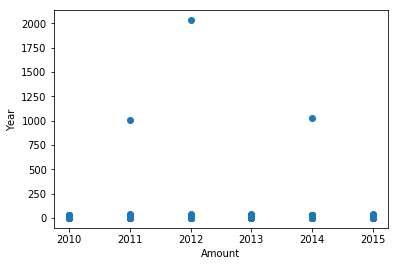

In [7]:
#Scatterplot to see the variation in amount spent over years
df_year = df
df_year['Year'] = pd.DatetimeIndex(df_year['TransactionDate']).year
xs = df_year['Year']
ys = df_year['Amount']
plt.scatter(xs, ys)
plt.xlabel('Amount',fontsize = 10)
plt.ylabel('Year', fontsize = 10)
plt.show()

This plot clearly tells us that we have 3 outliers that stand out in our data. To understand the trend in data, I've looked at the mean and median spending in the plots below.

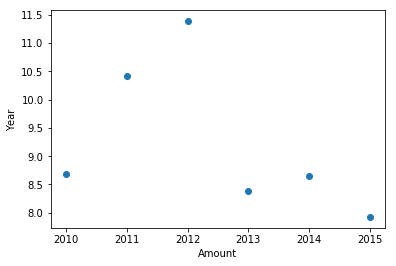

In [8]:
#Scatterplot to see the mean amount spent over years
newdf_mean = df_year.groupby(df_year['Year'])['Amount'].mean()
xs = np.sort(df_year['Year'].unique())
ys = list(newdf_mean)
plt.scatter(xs, ys)
plt.xlabel('Amount',fontsize = 10)
plt.ylabel('Year', fontsize = 10)
plt.show()

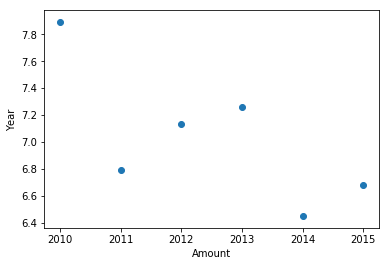

In [9]:
#Scatterplot to see the median amount spent over years
newdf_median = df_year.groupby(df_year['Year'])['Amount'].median()
xs = np.sort(df_year['Year'].unique())
ys = list(newdf_median)
plt.scatter(xs, ys)
plt.xlabel('Amount',fontsize = 10)
plt.ylabel('Year', fontsize = 10)
plt.show()

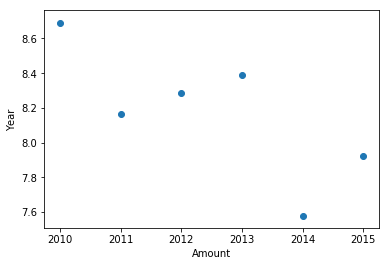

In [10]:
#Scatterplot to see the mean amount spent over years after removing outliers
df_without_outliers = df[(np.abs(df.Amount-df.Amount.mean()) <= (3*df.Amount.std())) & (df.Amount > 0)]
newdf_mean_out = df_without_outliers.groupby(df_year['Year'])['Amount'].mean()
xs = np.sort(df_year['Year'].unique())
ys = list(newdf_mean_out)
plt.scatter(xs, ys)
plt.xlabel('Amount',fontsize = 10)
plt.ylabel('Year', fontsize = 10)
plt.show()

No, the transaction amounts don't generally increase over time. They increased over time from 2011 to 2013 and then dropped in 2014 (looking at the mean spend over years and considering we have outliers in 2011, 2012 and 2014). Hence we can say that there is no general trend of increase in amounts.

## Step 2: Explore the dataset

### Are there any outliers?

In [11]:
df_outliers = df[np.abs(df.Amount-df.Amount.mean()) > (3*df.Amount.std())]
print('Count of outliers:', df_outliers['TransactionID'].count())
df_outliers

Count of outliers: 3


,TransactionID,TransactionDate,CustomerID,Amount,Year
23,24,10/7/2011,7,1003.0,2011
211,212,5/14/2014,54,1027.0,2014
4177,4178,8/13/2012,1000,2033.0,2012


In [12]:
df_outliers_neg = df[(df.Amount) < 0]
print('Count of negative outliers:', df_outliers_neg['TransactionID'].count())
df_outliers_neg

Count of negative outliers: 2


,TransactionID,TransactionDate,CustomerID,Amount,Year
49,50,5/12/2012,13,-1.0,2012
3326,3327,1/16/2014,811,-1.0,2014


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F08746FE48>]],
      dtype=object)

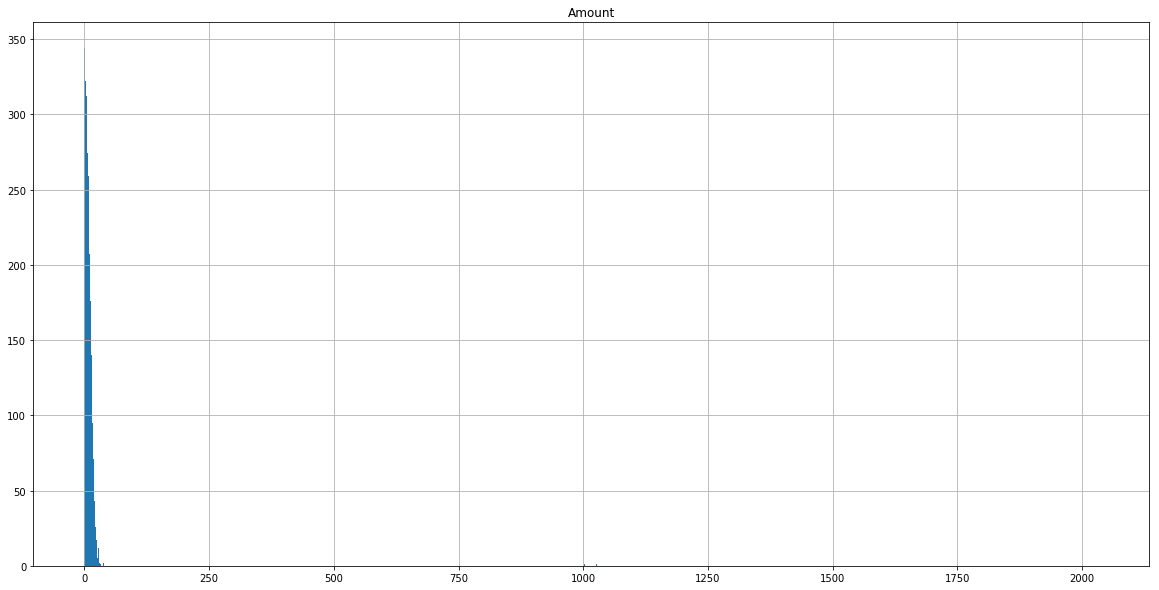

In [13]:
df.hist(column='Amount', bins='auto', figsize=(20,10))

Yes, there are around 5 outliers in the dataset. I calculated them based on the histogram and the 3 time standard deviation rule. So the values that are 3 times the standard deviation away from the mean have been removed. Additionally, the amount can not be negative. Hence, negative transactions have also been removed

### If so how would you treat them?

Count (without outliers): 4181


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F08766D5C0>]],
      dtype=object)

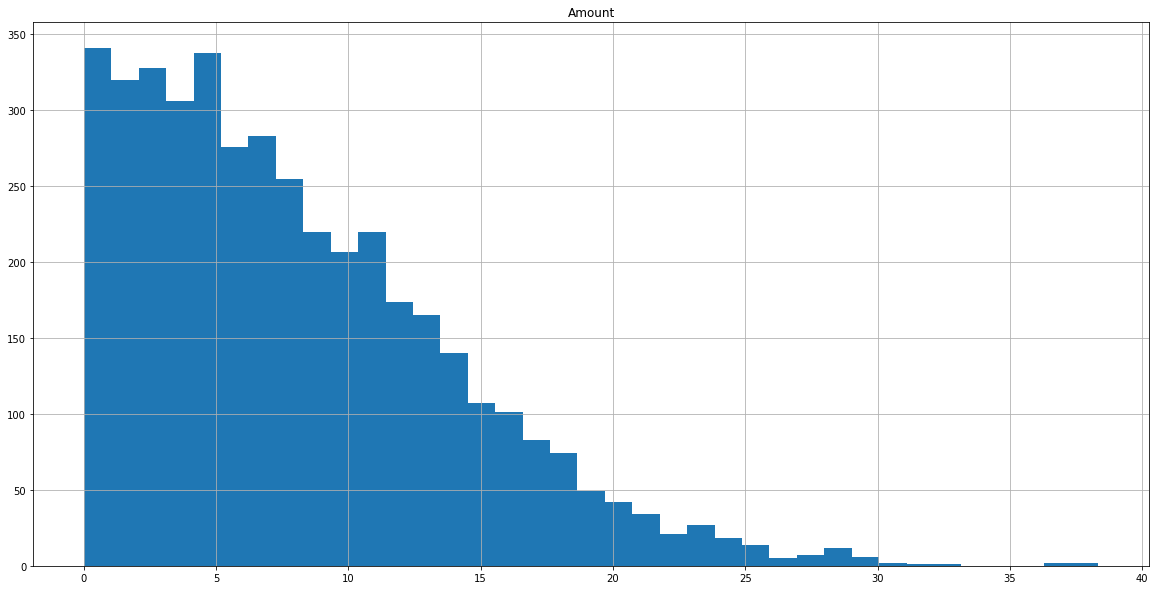

In [14]:
#Removed outliers by using 3 std dev formula and then plotted histogram
df_without_outliers = df[(np.abs(df.Amount-df.Amount.mean()) <= (3*df.Amount.std())) & (df.Amount > 0)]
print('Count (without outliers):', df_without_outliers['TransactionID'].count())
df_without_outliers.hist(column='Amount', bins='auto', figsize=(20,10))

We should remove the outliers to remove skewness from our data. As we can see from the graph above, we can see that post removing outliers the range of our distribution seems to narrow down quite a lot. Additionally, the amount can not be negative. Hence these values should also not be considered.

## Step 3: Determine origin year of customers

In [15]:
df_year = df_without_outliers.copy()
df_year['Year'] = pd.DatetimeIndex(df_year['TransactionDate']).year

summed_df = df_year.groupby(df_year['CustomerID'])[['Year']].min()
merged_df = pd.merge(df_year, summed_df, on='CustomerID', how='left')
merged_df = merged_df.rename(columns = {"Year_x": "Year", "Year_y":"Origin_Year"}) 

merged_df.head()

,TransactionID,TransactionDate,CustomerID,Amount,Year,Origin_Year
0,1,9/4/2012,1,20.26,2012,2012
1,2,5/15/2012,2,10.87,2012,2012
2,3,5/23/2014,2,2.21,2014,2012
3,4,10/24/2014,2,10.48,2014,2012
4,5,10/13/2012,2,3.94,2012,2012


## Step 4: Calculate cumulative transaction amounts

In [16]:
merged_df_amount = merged_df
merged_df_amount['12'] = np.where(merged_df_amount['Origin_Year'] == merged_df_amount['Year'], merged_df_amount['Amount'], 0)
merged_df_amount['24'] = np.where((merged_df_amount['Year'] - merged_df_amount['Origin_Year'])==1, merged_df_amount['Amount'], 0)
merged_df_amount['36'] = np.where((merged_df_amount['Year'] - merged_df_amount['Origin_Year'])==2, merged_df_amount['Amount'], 0)
merged_df_amount['48'] = np.where((merged_df_amount['Year'] - merged_df_amount['Origin_Year'])==3, merged_df_amount['Amount'] , 0)
merged_df_amount['60'] = np.where((merged_df_amount['Year'] - merged_df_amount['Origin_Year'])==4, merged_df_amount['Amount'], 0)
merged_df_amount['72'] = np.where((merged_df_amount['Year'] - merged_df_amount['Origin_Year'])==5, merged_df_amount['Amount'], 0)

summed_df1 = merged_df_amount.groupby(['Origin_Year'])[['12','24','36','48','60','72']].sum()
summed_df2 = pd.DataFrame(np.where(summed_df1==0, 0, summed_df1.cumsum(1)),index=list(summed_df1.index),
                          columns=['12','24','36','48','60','72'])

as_list2 = ['2010-01-01 - 2010-12-31','2011-01-01 - 2011-12-31','2012-01-01 - 2012-12-31','2013-01-01 - 2013-12-31',
            '2014-01-01 - 2014-12-31','2015-01-01 - 2015-12-31']
summed_df2.index = as_list2
summed_df2.index.name = 'Origin'

summed_df4 = pd.DataFrame(np.where((summed_df2 > 0), round(summed_df2,2), ''),index=list(summed_df2.index),
                          columns=['12','24','36','48','60','72'])
summed_df4.index = as_list2
summed_df4.index.name = 'Origin'
summed_df4

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01 - 2011-12-31,2238.46,3757.9,5465.99,6703.11,7862.24,
2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,,
2013-01-01 - 2013-12-31,2179.85,3609.81,5227.75,,,
2014-01-01 - 2014-12-31,1830.85,3262.05,,,,
2015-01-01 - 2015-12-31,1912.17,,,,,


## Step 5: Calculate new customers

In [17]:
merged_df_customers = merged_df
merged_df_customers['12'] = np.where((merged_df_customers['Year'] == merged_df_customers['Origin_Year']), 1, 0)
merged_df_customers['24'] = np.where((merged_df_customers['12']==1) & (merged_df_customers['Origin_Year']<2015), 1, 0)
merged_df_customers['36'] = np.where((merged_df_customers['12']==1) & (merged_df_customers['Origin_Year']<2014), 1, 0)
merged_df_customers['48'] = np.where((merged_df_customers['12']==1) & (merged_df_customers['Origin_Year']<2013), 1, 0)
merged_df_customers['60'] = np.where((merged_df_customers['12']==1) & (merged_df_customers['Origin_Year']<2012), 1, 0)
merged_df_customers['72'] = np.where((merged_df_customers['12']==1) & (merged_df_customers['Origin_Year']<2011), 1, 0)
merged_df_customers = merged_df_customers[merged_df_customers['12'] != 0]

x = merged_df_customers.sort_values('CustomerID', ascending=False).drop_duplicates('CustomerID').sort_index()

summed_df3 = x.groupby(['Origin_Year'])[['12','24','36','48','60','72']].sum()

summed_df3.index = as_list2
summed_df3.index.name = 'Origin'

summed_df5 = pd.DataFrame(np.where((summed_df3 > 0), summed_df3, ''),index=list(summed_df3.index),
                          columns=['12','24','36','48','60','72'])
summed_df5.index = as_list2
summed_df5.index.name = 'Origin'
summed_df5

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,172,172,172,172,172,172
2011-01-01 - 2011-12-31,170,170,170,170,170,
2012-01-01 - 2012-12-31,163,163,163,163,,
2013-01-01 - 2013-12-31,180,180,180,,,
2014-01-01 - 2014-12-31,155,155,,,,
2015-01-01 - 2015-12-31,160,,,,,


## Step 6: Historic CLV

In [18]:
historic_clv_zero = pd.DataFrame(np.where((summed_df2/summed_df3 >=0), round(summed_df2/summed_df3,2), 0),index=list(summed_df3.index),
                          columns=['12','24','36','48','60','72'])
historic_clv = pd.DataFrame(np.where((summed_df2/summed_df3 >=0), round(summed_df2/summed_df3,2), ''),index=list(summed_df3.index),
                          columns=['12','24','36','48','60','72'])
historic_clv.index = as_list2
historic_clv.index.name = 'Origin'
historic_clv

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,13.14,21.02,30.67,38.56,46.11,52.12
2011-01-01 - 2011-12-31,13.17,22.11,32.15,39.43,46.25,
2012-01-01 - 2012-12-31,13.38,23.77,32.07,39.89,,
2013-01-01 - 2013-12-31,12.11,20.05,29.04,,,
2014-01-01 - 2014-12-31,11.81,21.05,,,,
2015-01-01 - 2015-12-31,11.95,,,,,


In [19]:
#function for Historic CLV graph
def plotsinglegraph(df, xlbl, ylbl, tit):
    plt.style.use('seaborn-darkgrid')
    df[df == 0.0] = np.nan
    df.plot(figsize=(20,10), fontsize = 15, marker='o')
    plt.title(tit, fontsize = 20)
    plt.xlabel(xlbl,fontsize = 20)
    plt.ylabel(ylbl, fontsize = 20)
    plt.legend(title ='Origin', fontsize = 15)
    legend = plt.legend(title ='Origin', fontsize = 15)
    legend.get_title().set_fontsize(20)
    idx =df.T.columns
    plt.xticks(range(len(idx)),idx)

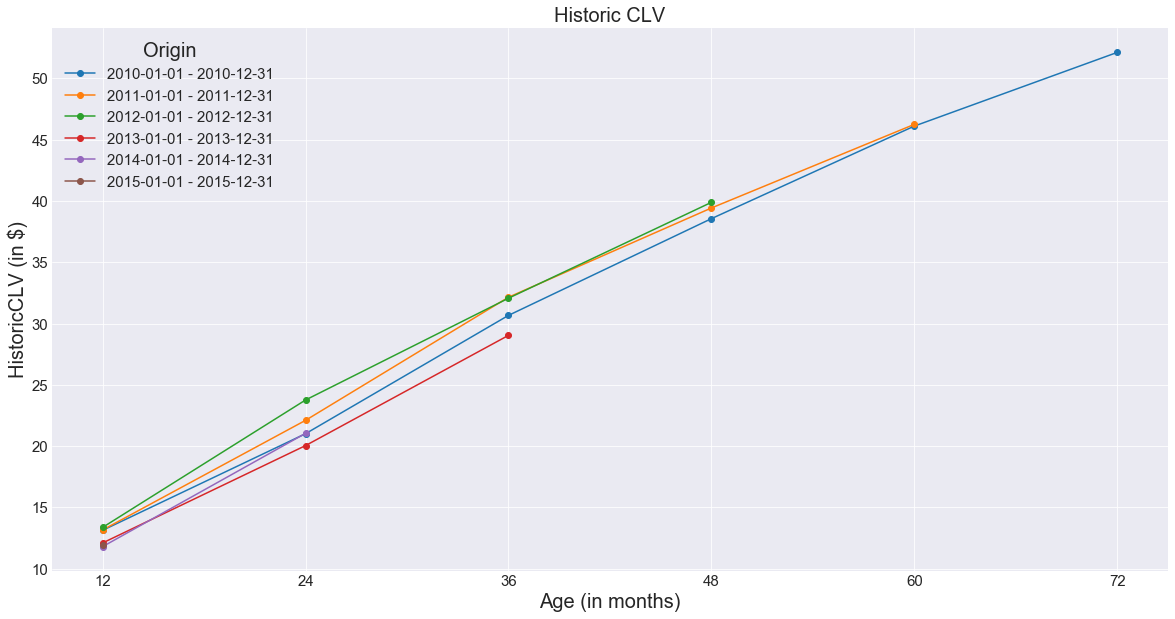

In [20]:
plotsinglegraph(historic_clv_zero.T, 'Age (in months)', 'HistoricCLV (in $)', 'Historic CLV')

In [21]:
historic_clv_wt_df = pd.DataFrame(np.where((historic_clv_zero*summed_df3 >=0), round(historic_clv_zero*summed_df3,2), 0),index=list(summed_df3.index),
                          columns=['12','24','36','48','60','72'])

Total_df = pd.DataFrame(historic_clv_wt_df.sum())
Total_cust_df = pd.DataFrame(summed_df3.sum())

CLV = round(Total_df/Total_cust_df,2)
CLV.rename(columns = {0:'HistoricCLV'}, inplace = True)
CLV.index.name = 'Age'
CLV

,HistoricCLV
Age,
12,12.60
24,21.57
36,30.94
48,39.28
60,46.18
72,52.12


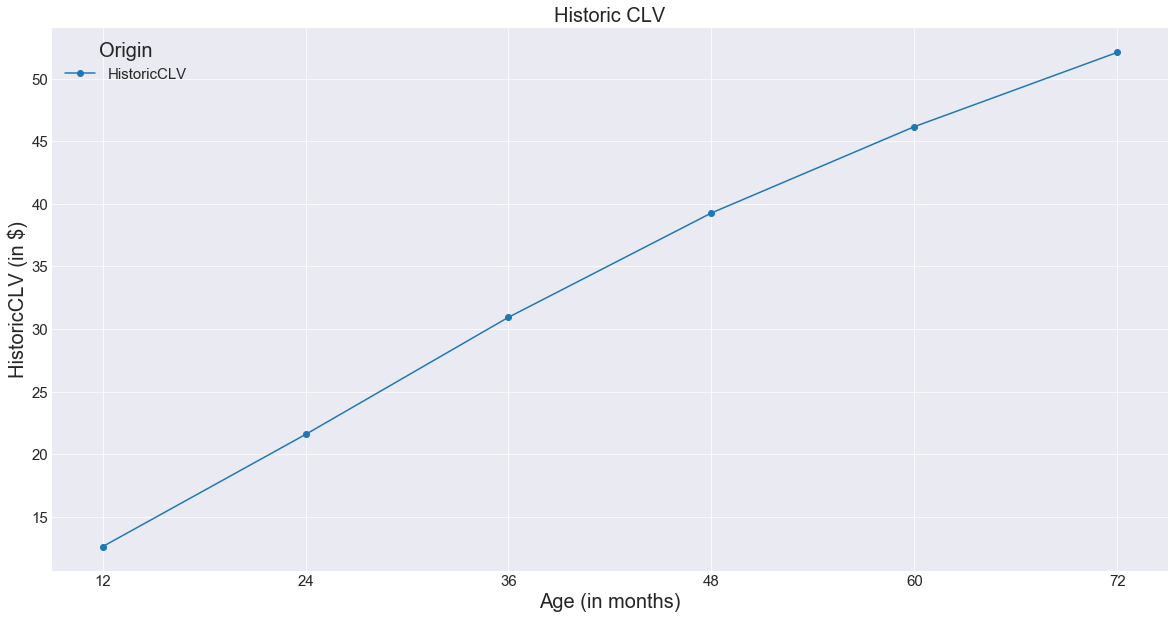

In [22]:
plotsinglegraph(CLV, 'Age (in months)', 'HistoricCLV (in $)', 'Historic CLV')

## Step 7: Interpreting your results

### How much have customers acquired in 2011 spent to date

Customers acquired in 2010 have spent \\$7862.24 in total and \\$46.25 on average to date. 

### Do each group of customers exhibit similar or different patterns of spending? What's the implication for the business?

Yes, each group of customers appears to exhibit a very similar pattern of spending.
This should give us confidence in assuming \\$52.12 (Customers acquired in 2010 have spent \\$52.12 to date) is a decent lower bound on CLV. This means that the cost to acquire a customer should be less than this lower bound (i.e \\$52.12) for the company to be profitable.